# Comparison of classifiers on simulated data

In [32]:
from sklearn.datasets import make_moons, make_circles, make_classification
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from matplotlib.colors import ListedColormap

The following are 3 useful functions for plotting a dataset (only training, or all data split into training and test) and the decision boundary of a model and the data

In [33]:
def plot_dataset_train(X, X_train, y_train):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(1,1,1)
    ax.set_title("Input data")
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

In [34]:
def plot_dataset(X, X_train, y_train, X_test, y_test):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(1,1,1)
    ax.set_title("Input data")
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.2, edgecolors="k")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

In [35]:
def plot_model(input_model, X, X_train, X_test, y_train, y_test):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(1,1,1)
    ax.set_title("Model decision boundary")
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(input_model, "decision_function"):
        Z = input_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = input_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter( X_test[:, 0], X_test[:, 1],c=y_test,
    cmap=cm_bright, edgecolors="k", alpha=0.2)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

Let's generate an almost linearly separable dataset and run the perceptron first, than SVM, then a NN with default parameters

In [36]:
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=42)


Let's plot the training dataset.

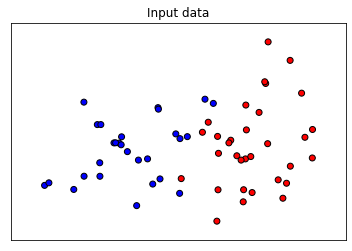

In [37]:
plot_dataset_train(X, X_train, y_train)

Let's now print all data (training and testing)

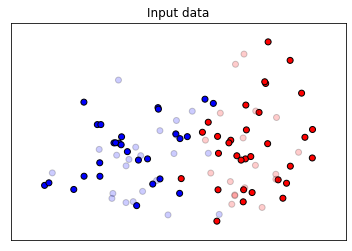

In [38]:
plot_dataset(X, X_train, y_train, X_test, y_test)

Now let's learn a perceptron, plot its decision boundary, and print the error on traning and on testing.

Training error: 0.033333333333333326
Test error: 0.050000000000000044


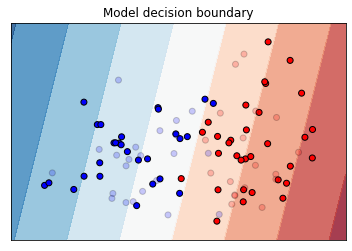

In [39]:
Percept_model = Perceptron(random_state=11)
Percept_model.fit(X_train, y_train)

print(f'Training error: {1. - Percept_model.score(X_train, y_train)}')
print(f'Test error: {1. - Percept_model.score(X_test, y_test)}')

plot_model(Percept_model, X, X_train, X_test, y_train, y_test)

Let's do the same for SVM.

Training error: 0.050000000000000044
Test error: 0.050000000000000044


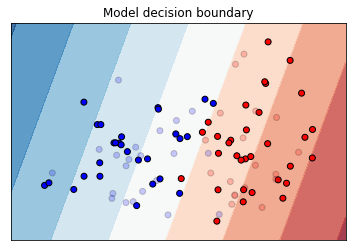

In [40]:
SVM_model = SVC(kernel='linear')
SVM_model.fit(X_train, y_train)

print(f'Training error: {1. - SVM_model.score(X_train, y_train)}')
print(f'Test error: {1. - SVM_model.score(X_test, y_test)}')

plot_model(SVM_model, X, X_train, X_test, y_train, y_test)

Let's try with a NN.

Training error: 0.06666666666666665
Test error: 0.07499999999999996


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


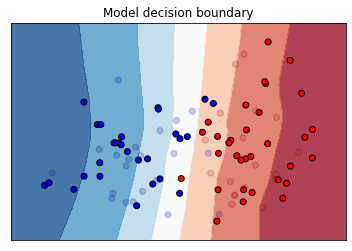

In [41]:
NN_model = MLPClassifier(max_iter=100)
NN_model.fit(X_train, y_train)

print(f'Training error: {1. - NN_model.score(X_train, y_train)}')
print(f'Test error: {1. - NN_model.score(X_test, y_test)}')

plot_model(NN_model, X, X_train, X_test, y_train, y_test)

Let's try now with some more complex dataset.

In [42]:
X, y = make_moons(noise=0.3, random_state=0)

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=42)

Let's plot the training data.

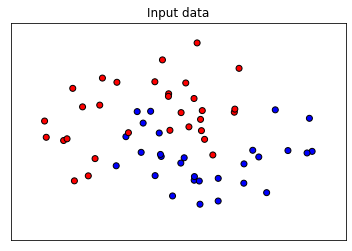

In [43]:
plot_dataset_train(X, X_train, y_train)

Let's plot all the data.

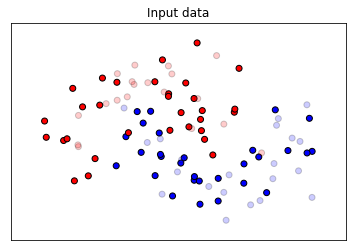

In [44]:
plot_dataset(X, X_train, y_train, X_test, y_test)

Let's run the perceptron.

Training error: 0.18333333333333335
Test error: 0.09999999999999998


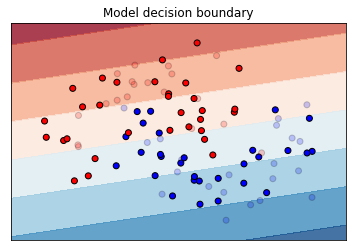

In [45]:
Percept_model = Perceptron()
Percept_model.fit(X_train, y_train)

print(f'Training error: {1. - Percept_model.score(X_train, y_train)}')
print(f'Test error: {1. - Percept_model.score(X_test, y_test)}')

plot_model(Percept_model, X, X_train, X_test, y_train, y_test)

Let's run the SVM

Training error: 0.16666666666666663
Test error: 0.125


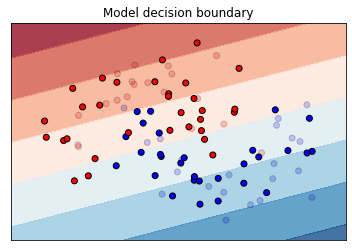

In [46]:
SVM_model = SVC(kernel='linear')
SVM_model.fit(X_train, y_train)

print(f'Training error: {1. - SVM_model.score(X_train, y_train)}')
print(f'Test error: {1. - SVM_model.score(X_test, y_test)}')

plot_model(SVM_model, X, X_train, X_test, y_train, y_test)

Let's try the NN

Training error: 0.1333333333333333
Test error: 0.125


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


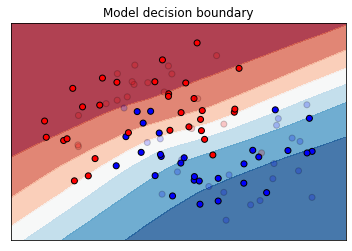

In [47]:
NN_model = MLPClassifier(max_iter=100)
NN_model.fit(X_train, y_train)

print(f'Training error: {1. - NN_model.score(X_train, y_train)}')
print(f'Test error: {1. - NN_model.score(X_test, y_test)}')

plot_model(NN_model, X, X_train, X_test, y_train, y_test)

Another interesting dataset

In [48]:
X, y= make_circles(noise=0.2, factor=0.5, random_state=1)

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=42)

Let's plot the training data.

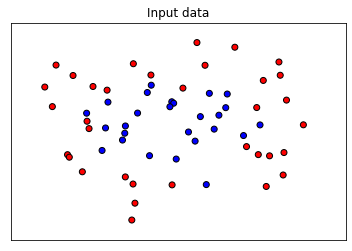

In [49]:
plot_dataset_train(X, X_train, y_train)

Let's plot all the data.

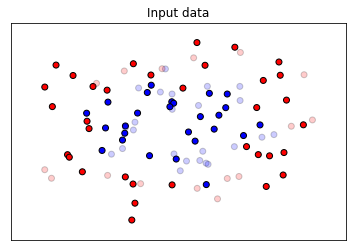

In [50]:
plot_dataset(X, X_train, y_train, X_test, y_test)

Let's run the perceptron

Training error: 0.43333333333333335
Test error: 0.6


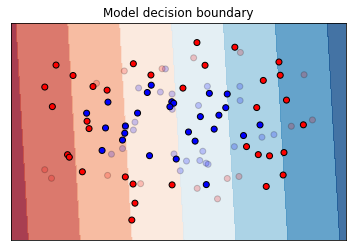

In [51]:
Percept_model = Perceptron()
Percept_model.fit(X_train, y_train)

print(f'Training error: {1. - Percept_model.score(X_train, y_train)}')
print(f'Test error: {1. - Percept_model.score(X_test, y_test)}')

plot_model(Percept_model, X, X_train, X_test, y_train, y_test)

Let's run the SVM

Training error: 0.43333333333333335
Test error: 0.6


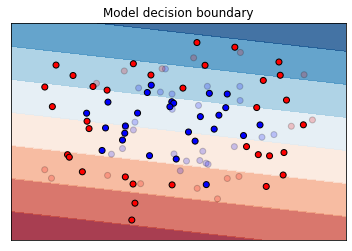

In [52]:
SVM_model = SVC(kernel='linear')
SVM_model.fit(X_train, y_train)

print(f'Training error: {1. - SVM_model.score(X_train, y_train)}')
print(f'Test error: {1. - SVM_model.score(X_test, y_test)}')

plot_model(SVM_model, X, X_train, X_test, y_train, y_test)

Let's run the NN

Training error: 0.18333333333333335
Test error: 0.275


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


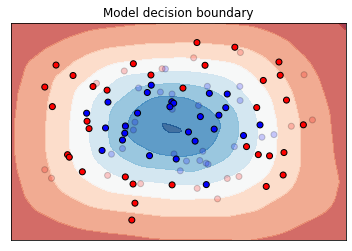

In [53]:
NN_model = MLPClassifier(max_iter=100)
NN_model.fit(X_train, y_train)

print(f'Training error: {1. - NN_model.score(X_train, y_train)}')
print(f'Test error: {1. - NN_model.score(X_test, y_test)}')

plot_model(NN_model, X, X_train, X_test, y_train, y_test)